<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Object-Oriented Programming: Coding a Normal Distribution Class

_Author: Justin Pounders (ATL)_

---


In [3]:
# The following modules are used for plotting and generating data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
%matplotlib inline

In [4]:
# These imports are needed by the class
import numpy as np
from scipy.special import erf

## Your Mission
### Should you choose to accept it...

Let's define normal.  Specifically, let's create a class that represents various facets of the normal distribution.  First, some review.

### The Shape of Normal

Mathematically, the probability density function (pdf) for the normal (or Gaussian) distribution can be written as follows:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

The cumulative distribution function (cdf), on the other hand, is

$$
F( x | \mu, \sigma^2) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) \right]
$$

where $\text{erf}(\cdot)$ is the "error function."  This error function is technically called a "special function" (yes, really), and for today's purposes we will calculate its value using the `erf` function imported from `scipy.stats` above.

### Time for `class`

Let's lay out some requirements for our "normal class":

- Let's name the class `Gaussian`
- The class attributes should include

  - `mu`, the mean
  - `sigma`, the standard deviation
  - `is_fit`, boolean indicating if mean/standard deviation were given or calculated.  More on this later.
  
- The class methods will include

  - `pdf`
  - `cdf`
  - `plot`
  - `fit`
  - `likelihood`
  
To keep things bite-sized and digestible, let's build the class up in 3 stages.

### Stage 1

First define you class and create the `__init__` "constructor" method.  This is also a good place to set class attributes.

Next, continue by implementing `pdf`, `cdf` and `plot`.

- The `pdf` method should take a single value `x` as input and return the normal PDF corresponding to `x`.
- The `cdf` method should take a single value `x` as input and return the normal CDF corresponding to `x`.
- The `plot` method should make a plot of the distribution and return the corresponding `matplotlib` figure.  (Bonus: add an input flag to plot either the PDF _or_ the CDF.)

> The above bullets are not a complete specification.  Feel free to rif and define the class that makes the most sense to you.

In [5]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        erf_value = erf((x-self.mu)/(self.sigma*np.sqrt(2)))
        return 0.5*(1 + erf_value)
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig

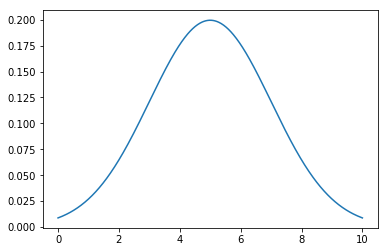

In [6]:
norm = Gaussian(5,2)
fig = norm.plot(0,10)

### Stage 2

Copy your class down below, and let's continue to add some functionality.

Specifically let's implement a `fit` method.  You can "fit" a normal distribution to a set of data by calculating the mean and standard deviation of the data, then assigning these values to a normal distribution.

For our class, try passing the `fit` method the raw data and have everything else happen inside the method.

I'll provide some test data to get started.  Once you think you've implemented it correctly you could test it out using something like the following, which will plot a histogram on top of you normal.

```python
norm = Gaussian()              # This will call the __init__ you implemented
norm.fit(df.samples.values)    # This is the fit method you just implemented.
fig = norm.plot(df.samples.min(), df.samples.max())   # This is the plot method you implemented

# And here is we plot the histogram
df.hist(ax=fig.get_axes(), normed=True, bins=20)```

In [21]:
# Here is the sample data
mu = 105
sigma = 20
test_norm = stats.norm(mu, sigma)

np.random.seed(seed=42)
samples = test_norm.rvs(1000)
df = pd.DataFrame({'samples':samples})
df.head()

,samples
0,114.934283
1,102.234714
2,117.953771
3,135.460597
4,100.316933


In [22]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        return 0.5*(1 + erf((x-self.mu)/(self.sigma*np.sqrt(2))))
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig
            
    def fit(self, data):
        self.mu = np.mean(data)
        self.sigma = np.std(data, ddof=1)
        return self

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bc99630>],
      dtype=object)

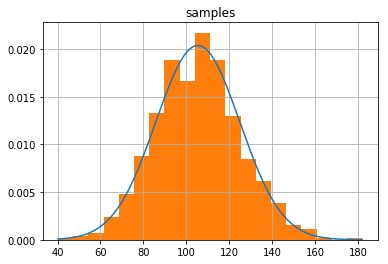

In [23]:
norm = Gaussian()
norm.fit(df.samples.values)
fig = norm.plot(df.samples.min(), df.samples.max())

df.hist(ax=fig.get_axes(), normed=True, bins=20)

### Stage 3 (Bonus Level!)

Now let's add a `likelihood` method.  In probability, the likelihood function tells us how likely it is that our data came from a given distribution.

For example, let's say that we have some normal distribution with fixed mean and standard deviation: $f(x | \mu, \sigma^2)$.

Now let's say we have a set of data, $x_1, x_2, x_3, ... x_N$ that we _think_ are sampled from our normal distribution.

The likelihood function tells how well our data fits the distribution; it is calculated as

$$
\text{likelihood} = \prod_{i=1}^N f(x_i | \mu, \sigma^2)
$$

*These numbers can get really small!*  It is therefore very common to calculate the "log likelihood:"

$$
\text{log(likelihood)} = \sum_{i=1}^N \ln\left[f(x_i | \mu, \sigma^2)\right]
$$

If you use the sample data from "Stage 2" then the following code should give you about an answer of about -4393.167.

```python
norm = Gaussian()
norm.fit(df.samples.values)
norm.log_likelihood(df.samples.values)
```

In [26]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        return 0.5*(1 + erf((x-self.mu)/(self.sigma*np.sqrt(2))))
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig
            
    def fit(self, data):
        self.mu = np.mean(data)
        self.sigma = np.std(data)
        return self
    
    def log_likelihood(self, data):
        return np.sum(np.log(self.pdf(data)))

For more information, check out [Chapter 4](http://anandology.com/python-practice-book/object_oriented_programming.html) in the _Python Practice Book_.